In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict
import gzip

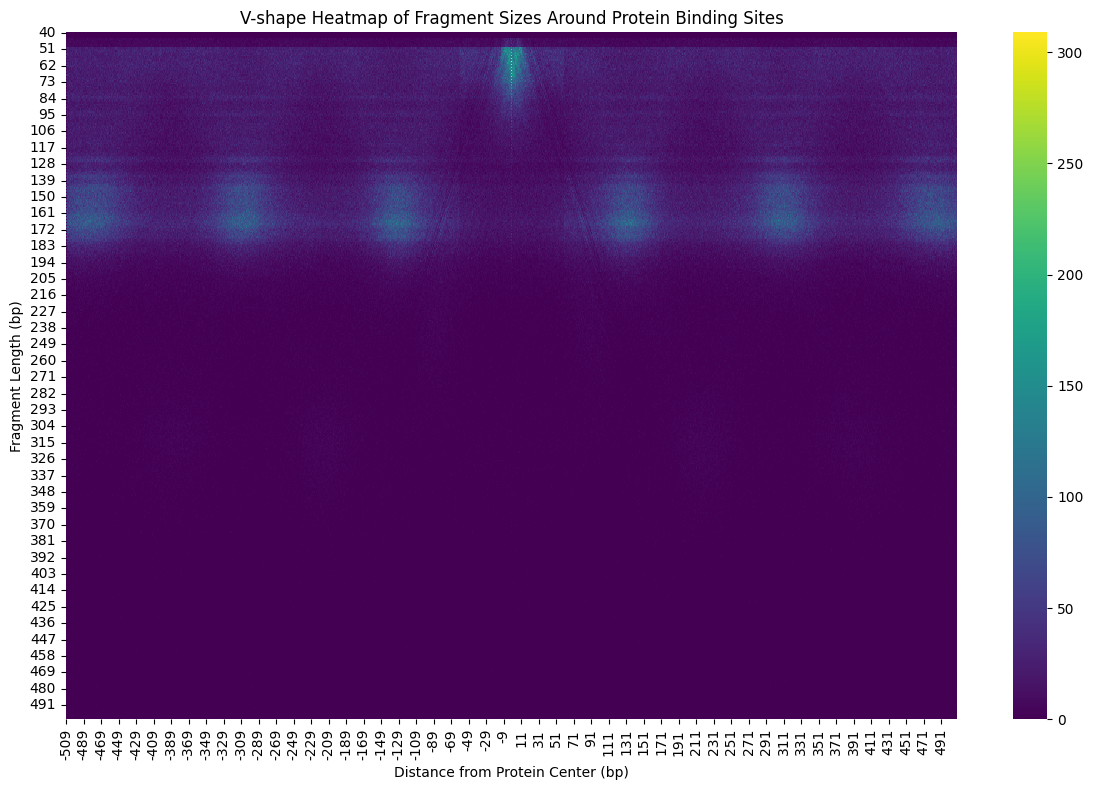

In [2]:
file1= 'mapped.bed.gz'
counts = defaultdict(int)
with gzip.open (file1, 'rt') as f:
  for line in f:
    parts= line.strip().split('\t')
    if len(parts)<10:
      continue

    try:
      start1= int(parts[2])
      end1= int(parts[3])
      start2= int(parts[8])
      end2= int(parts[9])

    except ValueError:
      continue

    C1= (start1 + end1)/2
    C2= (start2+ end2)/2

    X= int(C2-C1)
    Y= int(end2-start2)

    counts [(X,Y)]+=1

data=[{'X':x, "Y":y, "Z":z} for (x,y), z in counts.items()]
df= pd.DataFrame(data)

heatmap_df= df.pivot_table(index='Y', columns= 'X', values= 'Z', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, cmap='viridis')
plt.title('V-shape Heatmap of Fragment Sizes Around Protein Binding Sites')
plt.xlabel('Distance from Protein Center (bp)')
plt.ylabel('Fragment Length (bp)')
plt.tight_layout()
plt.show()